# Imports

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Physiological Information

Reference: *Data Descriptor: A new, short-recorded photoplethysmogram dataset for blood pressure monitoring in China*

## Loading

In [2]:
inf_df = pd.read_excel(
    "dataset/Data Files/PPG-BP dataset.xlsx",
    skiprows = 1,
    index_col = "Num.",
    na_values = "Normal"
)
inf_df.fillna("Normal", inplace = True)

In [3]:
inf_df.sample(10)

,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
Num.,,,,,,,,,,,,,
99,139,Female,69,150,61,141,67,61,27.111111,Stage 1 hypertension,Normal,cerebral infarction,Normal
165,215,Female,74,155,45,139,75,81,18.730489,Prehypertension,Normal,Normal,Normal
153,201,Female,65,165,72,143,77,63,26.446281,Stage 1 hypertension,Normal,Normal,Normal
88,125,Female,69,155,60,160,77,88,24.973985,Stage 2 hypertension,Normal,Normal,Normal
21,26,Male,54,170,70,125,75,82,24.221453,Prehypertension,Normal,Normal,Normal
85,122,Female,55,150,48,133,72,76,21.333333,Prehypertension,Normal,Normal,Normal
97,137,Female,79,148,40,128,64,73,18.261505,Prehypertension,Normal,Normal,insufficiency of cerebral blood supply
134,179,Female,64,151,45,117,82,69,19.735976,Normal,Normal,Normal,Normal
94,134,Female,72,157,39,122,65,83,15.822143,Prehypertension,Normal,cerebral infarction,Normal


In [4]:
inf_df.rename(
    columns = {
        "subject_ID": "sid",
        "Sex(M/F)": "gender",
        "Age(year)": "age",
        "Height(cm)": "height",
        "Weight(kg)": "weight",
        "Systolic Blood Pressure(mmHg)": "sbp",
        "Diastolic Blood Pressure(mmHg)": "dbp",
        "Heart Rate(b/m)": "hr",
        "BMI(kg/m^2)": "bmi",
        "Hypertension": "hypertension",
        "Diabetes": "diabetes"
    },
    inplace = True
)
inf_df.index.name = "number"

In [5]:
inf_df.sample(10, random_state = 0)

,sid,gender,age,height,weight,sbp,dbp,hr,bmi,hypertension,diabetes,cerebral infarction,cerebrovascular disease
number,,,,,,,,,,,,,
153,201,Female,65,165,72,143,77,63,26.446281,Stage 1 hypertension,Normal,Normal,Normal
75,108,Male,58,160,65,137,65,72,25.390625,Prehypertension,Normal,Normal,Normal
72,105,Female,86,161,70,130,66,69,27.005131,Prehypertension,Normal,Normal,cerebrovascular disease
162,212,Male,71,155,47,159,86,62,19.562955,Stage 1 hypertension,Normal,Normal,Normal
163,213,Male,63,169,62,151,91,55,21.707923,Stage 1 hypertension,Normal,Normal,Normal
144,191,Female,50,163,87,110,75,78,32.744928,Normal,Normal,Normal,Normal
64,95,Female,64,163,72,153,71,59,27.099251,Stage 1 hypertension,Normal,Normal,insufficiency of cerebral blood supply
154,203,Female,63,153,54,123,62,52,23.068051,Prehypertension,Normal,Normal,Normal
219,419,Male,24,175,58,108,68,65,18.938776,Normal,Normal,Normal,Normal


In [6]:
for column in inf_df.columns[-4:]:
    print("- ", column, "\n", pd.unique(inf_df[column]), sep = "")
    print()

- hypertension
['Stage 2 hypertension' 'Normal' 'Prehypertension' 'Stage 1 hypertension']

- diabetes
['Normal' 'Diabetes' 'Type 2 Diabetes']

- cerebral infarction
['Normal' 'cerebral infarction']

- cerebrovascular disease
['Normal' 'insufficiency of cerebral blood supply'
 'cerebrovascular disease']



In [7]:
inf_df["gender"] = inf_df["gender"].replace(["Male", "Female"], [1, 0]).astype("category")

In [8]:
inf_df = inf_df[["sid", "gender", "age", "height", "weight", "sbp", "dbp", "hr", "bmi"]]

In [9]:
inf_df.head(n = 10)

,sid,gender,age,height,weight,sbp,dbp,hr,bmi
number,,,,,,,,,
1,2,0,45,152,63,161,89,97,27.268006
2,3,0,50,157,50,160,93,76,20.284799
3,6,0,47,150,47,101,71,79,20.888889
4,8,1,45,172,65,136,93,87,21.971336
5,9,0,46,155,65,123,73,73,27.055151
6,10,0,48,160,68,124,62,70,26.562500
7,11,0,48,153,49,126,78,84,20.932120
8,12,0,53,160,70,108,73,84,27.343750
9,13,1,58,165,55,89,42,63,20.202020


In [10]:
inf_df.describe()

,sid,age,height,weight,sbp,dbp,hr,bmi
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,156.598174,57.168950,161.228311,60.191781,127.945205,71.849315,73.639269,23.107407
std,101.604347,15.874327,8.202871,11.886301,20.377779,11.111203,10.738874,4.004459
min,2.000000,21.000000,145.000000,36.000000,80.000000,42.000000,52.000000,14.692378
25%,85.500000,48.000000,155.000000,52.500000,113.500000,64.000000,66.000000,20.549887
50%,152.000000,58.000000,160.000000,60.000000,126.000000,70.000000,73.000000,22.600263
75%,214.500000,67.500000,167.000000,66.500000,139.000000,78.000000,80.000000,25.000000
max,419.000000,86.000000,196.000000,103.000000,182.000000,107.000000,106.000000,37.460978


## Visualization

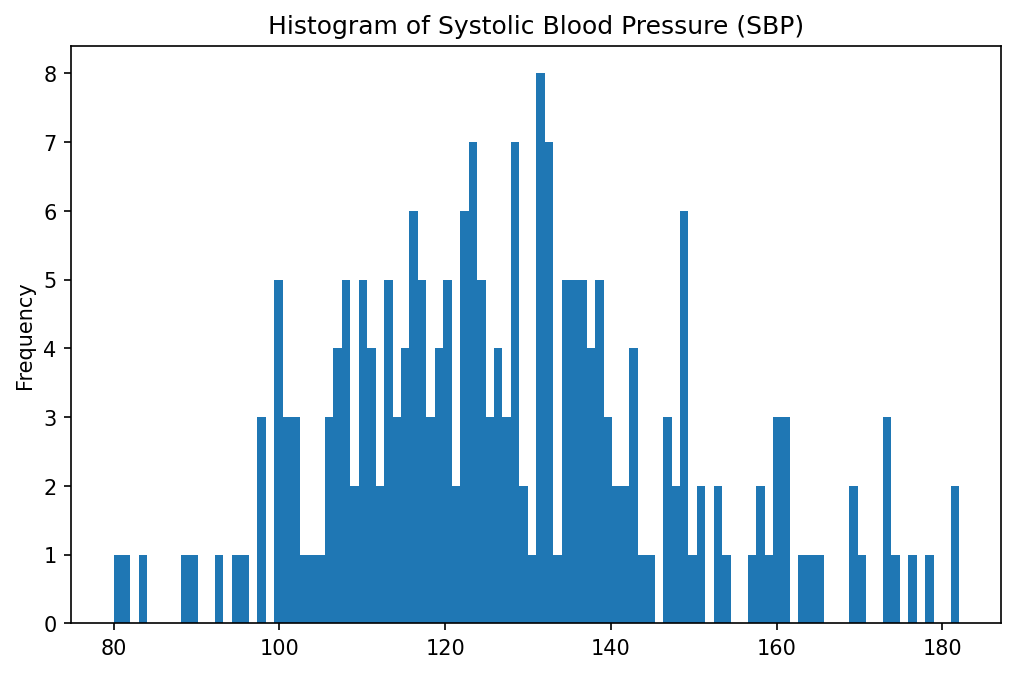

In [11]:
plt.figure(figsize = (8, 5), dpi = 150)
inf_df["sbp"].plot.hist(bins = 100)
plt.title("Histogram of Systolic Blood Pressure (SBP)")
plt.show()

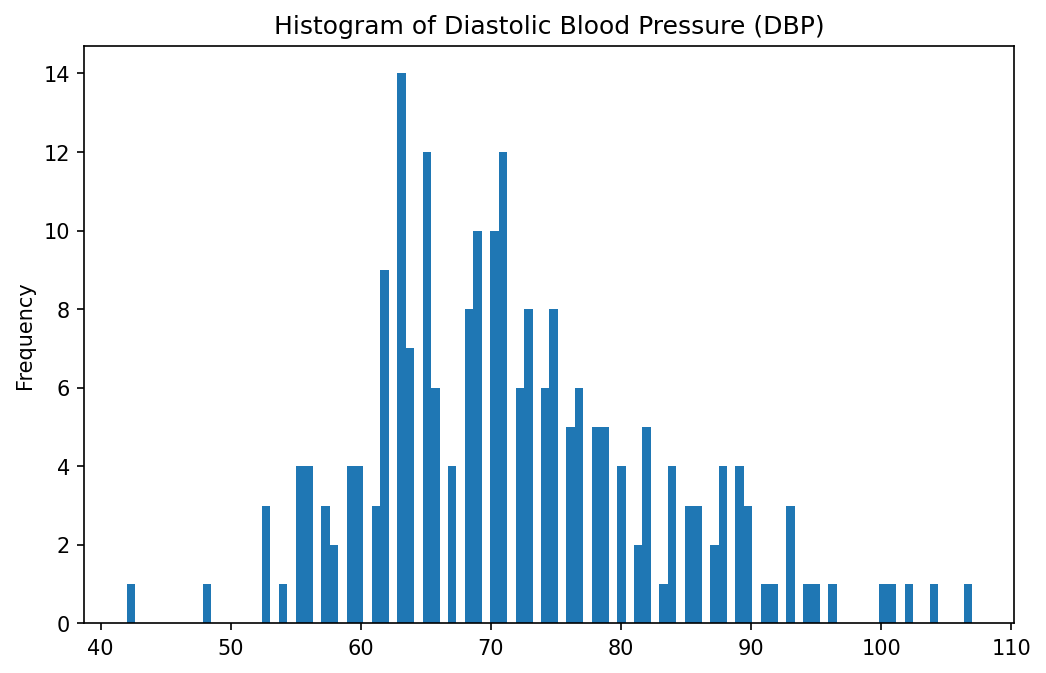

In [12]:
plt.figure(figsize = (8, 5), dpi = 150)
inf_df["dbp"].plot.hist(bins = 100)
plt.title("Histogram of Diastolic Blood Pressure (DBP)")
plt.show()

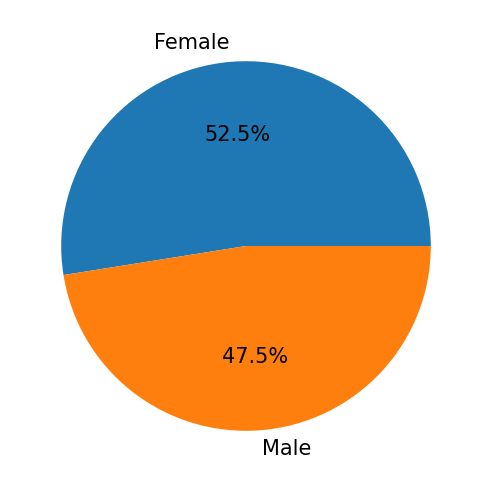

In [13]:
plt.figure(figsize = (4, 4), dpi = 150)
inf_df["gender"].value_counts().sort_index().plot(
    kind = "pie",
    rot = 0,
    autopct = "%1.1f%%",
    labels = ["Female", "Male"],
    ylabel = ""
)
plt.show()

# PPG Signals

## Loading Signals

In [14]:
sig_df = pd.DataFrame(
    columns = ["sid", "segment", "signal"]
)

sig_dfs = [sig_df]

for sid in tqdm(pd.unique(inf_df["sid"])):
    for segment in range(1, 4):
        sig = np.genfromtxt(f"dataset/Data Files/0_subject/{sid}_{segment}.txt", delimiter = "\t")
        sig = sig[~np.isnan(sig)]
        sig_dfs.append(
            pd.DataFrame(
                {
                    "sid": sid,
                    "segment": segment,
                    "signal": [sig]
                }
            )
        )
        
sig_df = pd.concat(sig_dfs)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 219/219 [00:07<00:00, 28.07it/s]


In [15]:
sig_df.reset_index(drop = True, inplace = True)

In [16]:
sig_df.head(10)

,sid,segment,signal
0,2,1,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384...."
1,2,2,"[2201.0, 2201.0, 2171.0, 2171.0, 2171.0, 2139...."
2,2,3,"[2019.0, 2014.0, 2014.0, 2014.0, 2009.0, 2009...."
3,3,1,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979...."
4,3,2,"[2008.0, 1982.0, 1982.0, 1982.0, 2007.0, 2007...."
5,3,3,"[1965.0, 1965.0, 1960.0, 1960.0, 1960.0, 1959...."
6,6,1,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993...."
7,6,2,"[1903.0, 1903.0, 1921.0, 1921.0, 1921.0, 1914...."
8,6,3,"[1942.0, 1912.0, 1912.0, 1912.0, 1905.0, 1905...."
9,8,1,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042...."


## Loading SQIs

Reference: *Optimal Signal Quality Index for Photoplethysmogram Signals*

In [17]:
sqi_dfs = []

start_index = 0

columns = []

while True:
    try:
        sqi_df = pd.read_excel(
            "dataset/Table 1.xlsx",
            usecols = range(start_index, start_index + 5),
        )
        if columns:
            sqi_df.columns = columns
        else:
            columns = list(sqi_df.columns)
    except:
        break
    
    sqi_dfs.append(sqi_df)
    
    start_index += 5

sqi_df = pd.concat(sqi_dfs)
sqi_df.dropna(inplace = True)

In [18]:
sqi_df.tail(10)

,Num.,subject ID,segment 1,segment 2,Segment 3
44,210.0,410.0,0.94,0.91,0.90
45,211.0,411.0,1.09,0.92,1.05
46,212.0,412.0,0.95,0.70,0.99
47,213.0,413.0,0.74,0.67,0.63
48,214.0,414.0,0.93,1.34,1.40
49,215.0,415.0,1.15,1.38,1.19
50,216.0,416.0,0.96,0.94,1.01
51,217.0,417.0,1.12,1.32,1.38
52,218.0,418.0,0.96,0.87,1.06
53,219.0,419.0,1.13,1.00,0.81


In [19]:
sqi_df.rename(
    columns = {
        "Num.": "number",
        "subject ID": "sid",
        "segment 1": "s1",
        "segment 2": "s2",
        "Segment 3": "s3",
    },
    inplace = True
)
sqi_df = sqi_df.astype(
    {
        "number": int
    }
)
sqi_df.set_index("number", inplace = True)

In [20]:
sqi_df.tail(10)

,sid,s1,s2,s3
number,,,,
210,410.0,0.94,0.91,0.90
211,411.0,1.09,0.92,1.05
212,412.0,0.95,0.70,0.99
213,413.0,0.74,0.67,0.63
214,414.0,0.93,1.34,1.40
215,415.0,1.15,1.38,1.19
216,416.0,0.96,0.94,1.01
217,417.0,1.12,1.32,1.38
218,418.0,0.96,0.87,1.06


In [21]:
sig_df["sqi"] = sig_df.apply(
    lambda x: sqi_df[sqi_df["sid"] == x["sid"]][f"s{x['segment']}"].item(),
    axis = 1
)

In [22]:
sig_df.head(15)

,sid,segment,signal,sqi
0,2,1,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",0.98
1,2,2,"[2201.0, 2201.0, 2171.0, 2171.0, 2171.0, 2139....",0.96
2,2,3,"[2019.0, 2014.0, 2014.0, 2014.0, 2009.0, 2009....",0.92
3,3,1,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....",0.69
4,3,2,"[2008.0, 1982.0, 1982.0, 1982.0, 2007.0, 2007....",0.80
5,3,3,"[1965.0, 1965.0, 1960.0, 1960.0, 1960.0, 1959....",0.81
6,6,1,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....",0.58
7,6,2,"[1903.0, 1903.0, 1921.0, 1921.0, 1921.0, 1914....",0.59
8,6,3,"[1942.0, 1912.0, 1912.0, 1912.0, 1905.0, 1905....",0.64
9,8,1,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",0.96


## Visualization

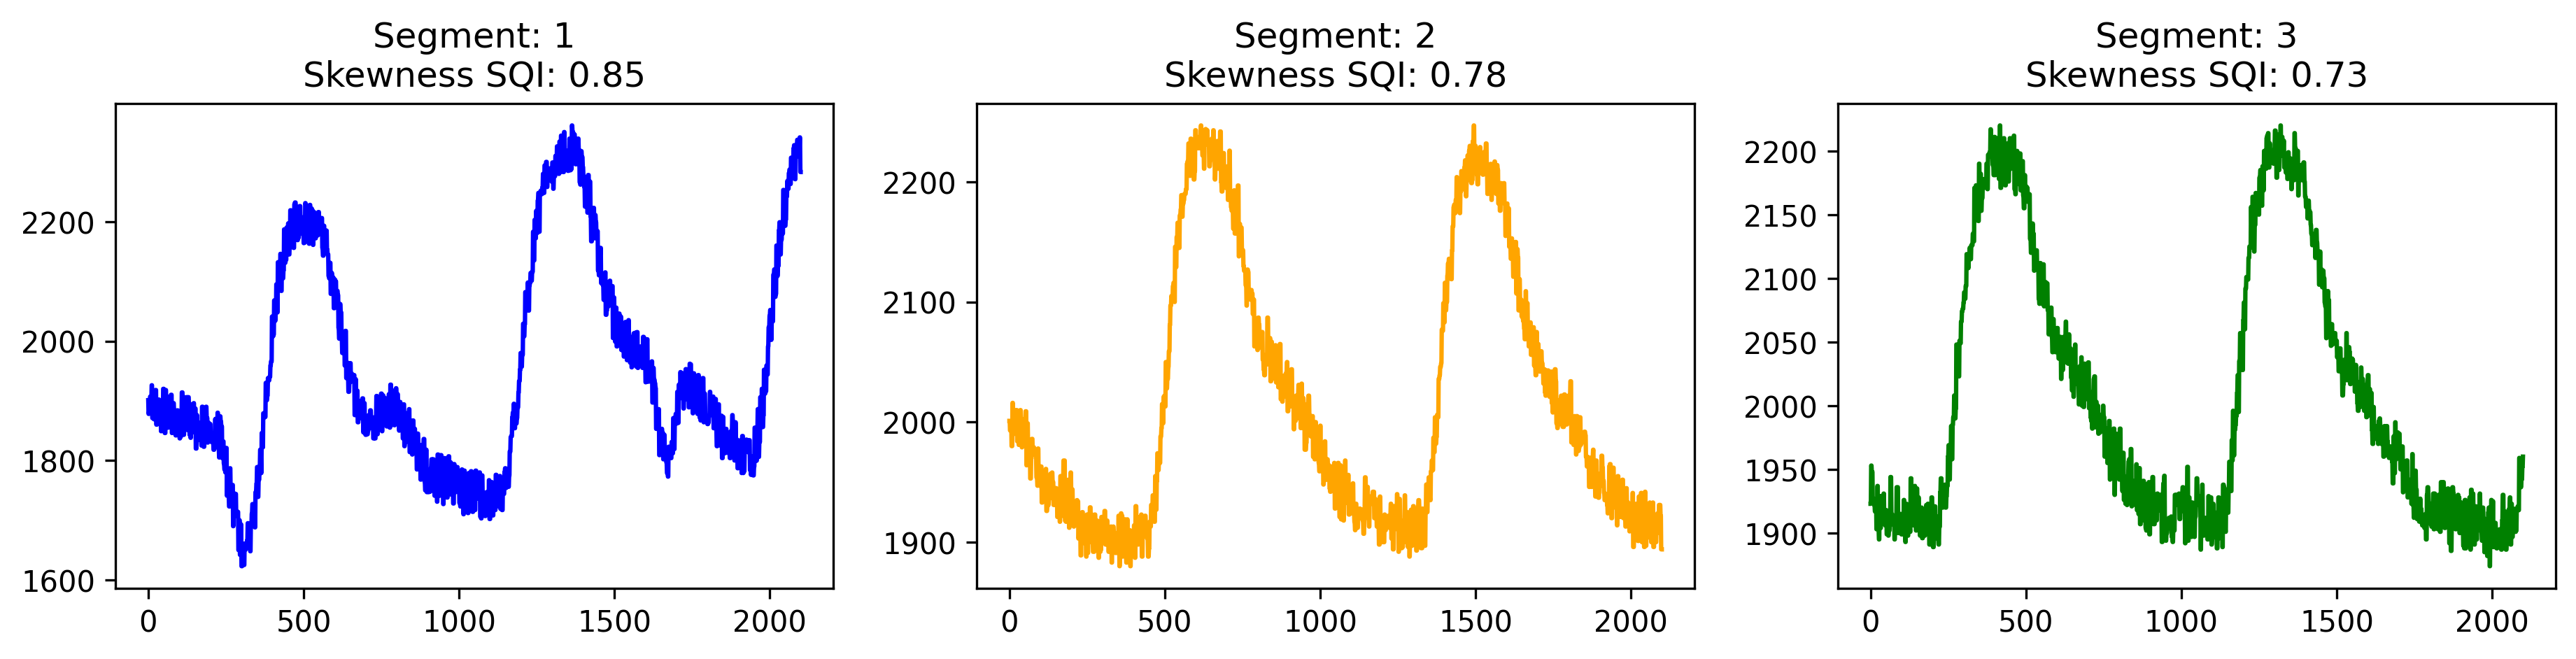

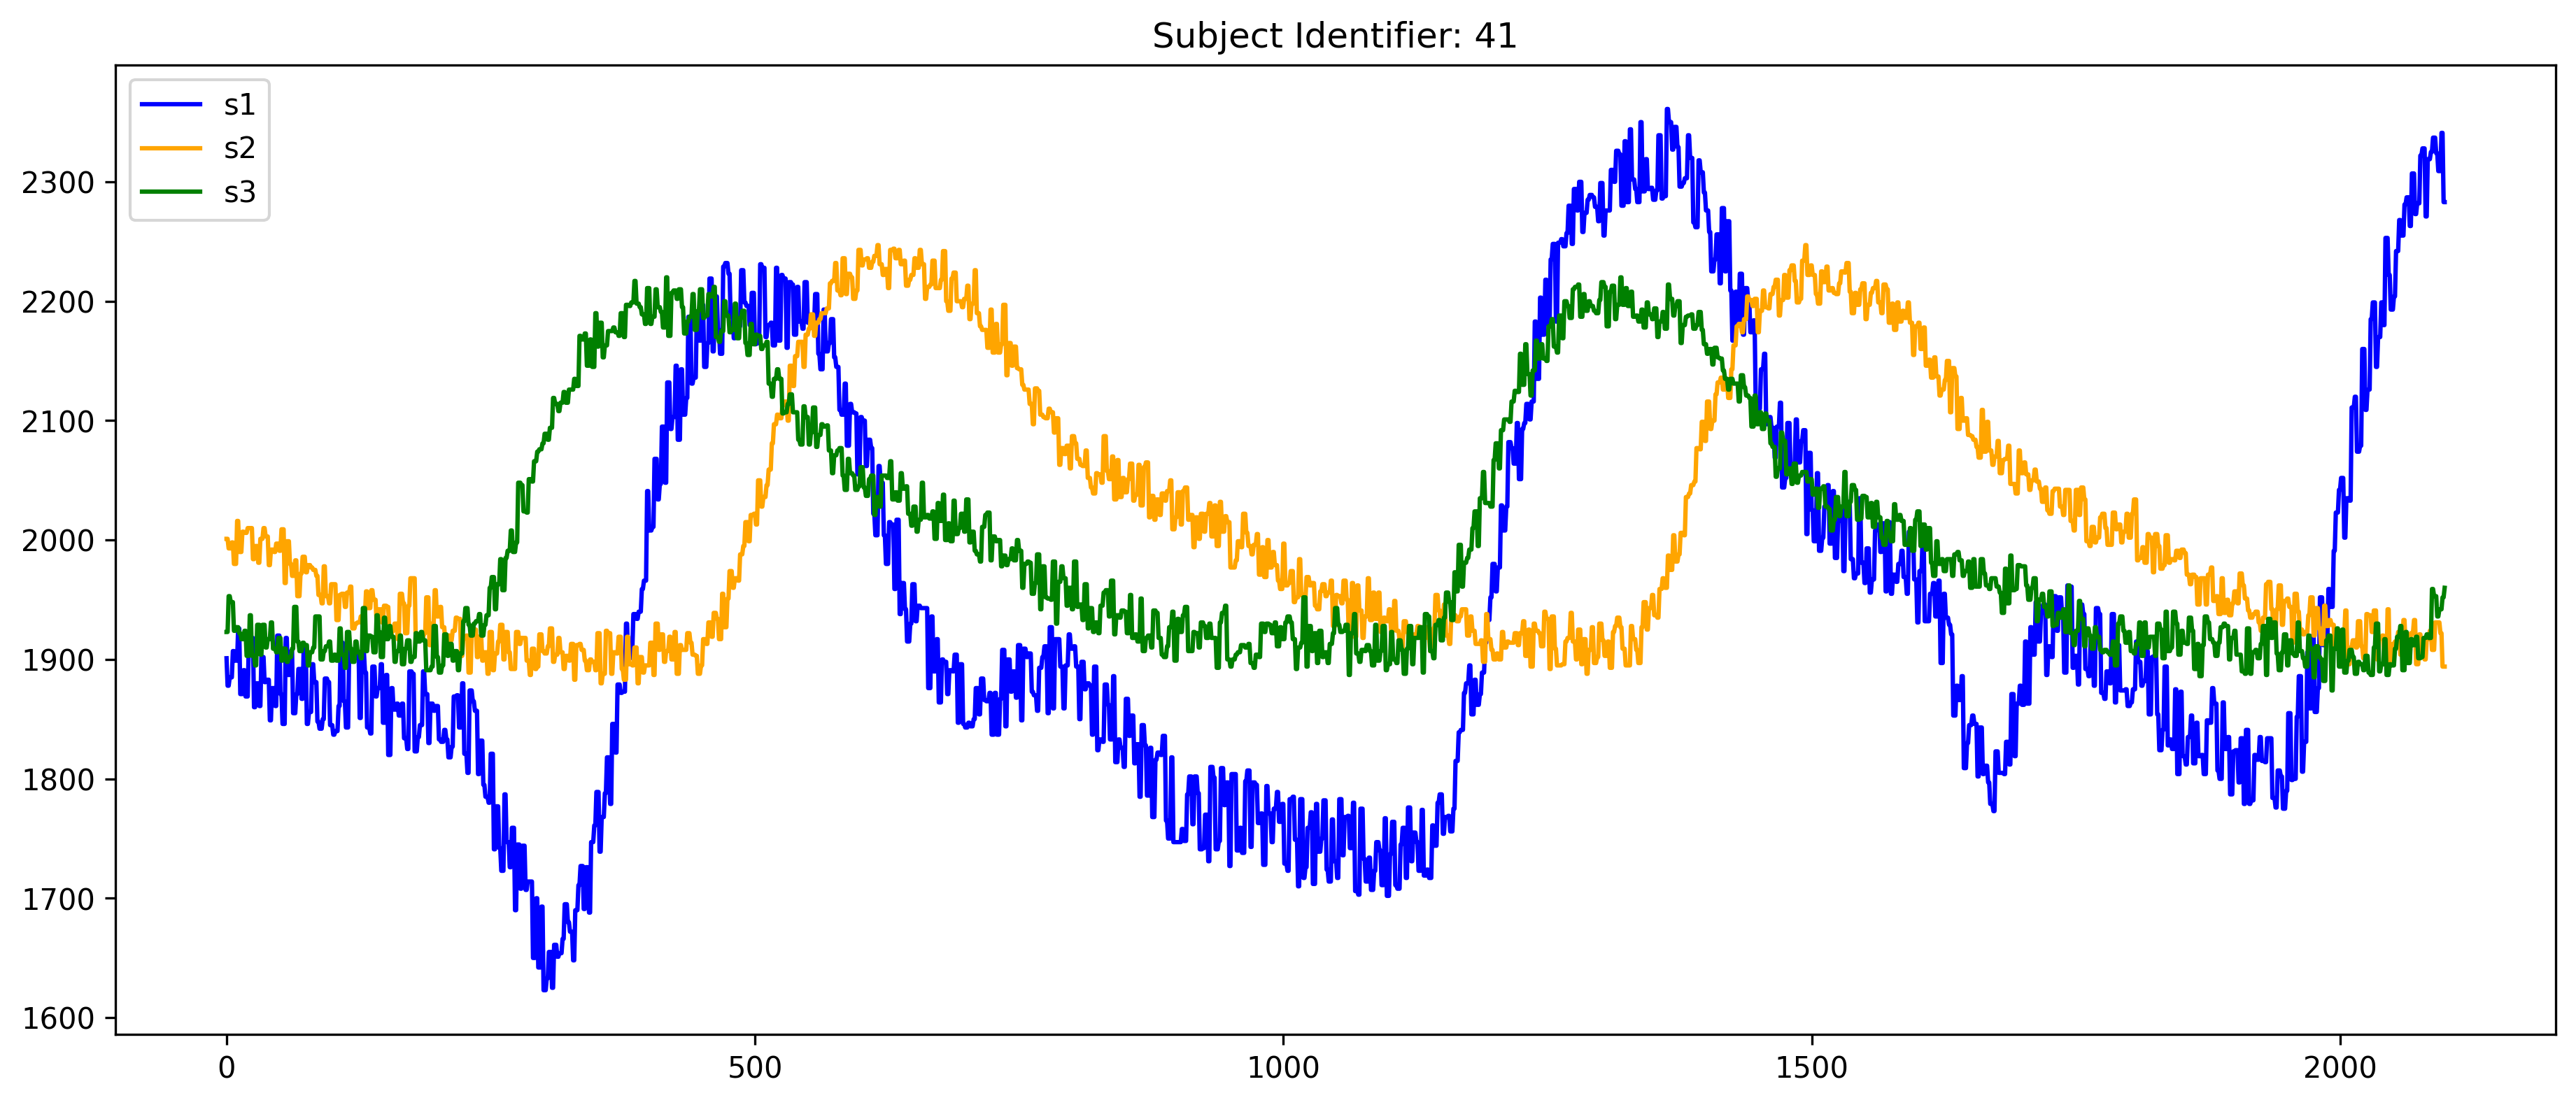

In [23]:
sid = 41
signals = sig_df.loc[sig_df["sid"] == sid]
colors = ["blue", "orange", "green"]

# Segments Separate Plots

fig, axs = plt.subplots(1, 3, dpi = 300)

for i, ax in enumerate(axs):
    signal = signals.iloc[i]
    ax.plot(signal["signal"], c = colors[i])
    ax.set_title(f"Segment: {signal['segment']}\nSkewness SQI: {signal['sqi']}")

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

# Segments All-in-One Plot

fig, ax = plt.subplots(dpi = 300)

for i in range(3):
    signal = signals.iloc[i]
    ax.plot(signal["signal"], c = colors[i])

ax.legend(list(f"s{i}" for i in range(1, 4)))
ax.set_title(f"Subject Identifier: {sid}")

fig.set_figwidth(15)
fig.set_figheight(6)

plt.show()

## Removing Segments with lower SQIs

In [24]:
s_dfs = []

for sid in pd.unique(sig_df["sid"]):
    best_sqi = sig_df[sig_df["sid"] == sid]["sqi"].max()
    s_dfs.append(
        sig_df[
            (sig_df["sid"] == sid) & (sig_df["sqi"] == best_sqi)
        ]
    )

s_df = pd.concat(s_dfs)

In [25]:
s_df.head(10)

,sid,segment,signal,sqi
0,2,1,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",0.98
5,3,3,"[1965.0, 1965.0, 1960.0, 1960.0, 1960.0, 1959....",0.81
8,6,3,"[1942.0, 1912.0, 1912.0, 1912.0, 1905.0, 1905....",0.64
9,8,1,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",0.96
14,9,3,"[1939.0, 1939.0, 1959.0, 1959.0, 1980.0, 1980....",0.87
16,10,2,"[2078.0, 2078.0, 2078.0, 2038.0, 2038.0, 2046....",0.64
18,11,1,"[1955.0, 1958.0, 1958.0, 1958.0, 1927.0, 1927....",0.74
22,12,2,"[1915.0, 1879.0, 1879.0, 1879.0, 1887.0, 1887....",0.73
26,13,3,"[1958.0, 1958.0, 1983.0, 1983.0, 1942.0, 1942....",1.06
27,14,1,"[1905.0, 1905.0, 1911.0, 1911.0, 1911.0, 1897....",0.77


In [26]:
print("Signals DataFrame Shape:", s_df.shape)

Signals DataFrame Shape: (224, 4)


In [27]:
s_df.drop_duplicates(
    subset = ["sid", "sqi"],
    keep = "last",
    inplace = True
)

In [28]:
print("Signals DataFrame Shape:", s_df.shape)

Signals DataFrame Shape: (219, 4)


In [29]:
s_df.head(n = 10)

,sid,segment,signal,sqi
0,2,1,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",0.98
5,3,3,"[1965.0, 1965.0, 1960.0, 1960.0, 1960.0, 1959....",0.81
8,6,3,"[1942.0, 1912.0, 1912.0, 1912.0, 1905.0, 1905....",0.64
9,8,1,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",0.96
14,9,3,"[1939.0, 1939.0, 1959.0, 1959.0, 1980.0, 1980....",0.87
16,10,2,"[2078.0, 2078.0, 2078.0, 2038.0, 2038.0, 2046....",0.64
18,11,1,"[1955.0, 1958.0, 1958.0, 1958.0, 1927.0, 1927....",0.74
22,12,2,"[1915.0, 1879.0, 1879.0, 1879.0, 1887.0, 1887....",0.73
26,13,3,"[1958.0, 1958.0, 1983.0, 1983.0, 1942.0, 1942....",1.06
27,14,1,"[1905.0, 1905.0, 1911.0, 1911.0, 1911.0, 1897....",0.77


In [30]:
s_df = s_df[["sid", "signal"]]

In [31]:
s_df.head(n = 10)

,sid,signal
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384...."
5,3,"[1965.0, 1965.0, 1960.0, 1960.0, 1960.0, 1959...."
8,6,"[1942.0, 1912.0, 1912.0, 1912.0, 1905.0, 1905...."
9,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042...."
14,9,"[1939.0, 1939.0, 1959.0, 1959.0, 1980.0, 1980...."
16,10,"[2078.0, 2078.0, 2078.0, 2038.0, 2038.0, 2046...."
18,11,"[1955.0, 1958.0, 1958.0, 1958.0, 1927.0, 1927...."
22,12,"[1915.0, 1879.0, 1879.0, 1879.0, 1887.0, 1887...."
26,13,"[1958.0, 1958.0, 1983.0, 1983.0, 1942.0, 1942...."
27,14,"[1905.0, 1905.0, 1911.0, 1911.0, 1911.0, 1897...."


# Unifying Data

In [32]:
uni_df = inf_df.merge(s_df, on = "sid")

In [33]:
uni_df.head(n = 10)

,sid,gender,age,height,weight,sbp,dbp,hr,bmi,signal
0,2,0,45,152,63,161,89,97,27.268006,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384...."
1,3,0,50,157,50,160,93,76,20.284799,"[1965.0, 1965.0, 1960.0, 1960.0, 1960.0, 1959...."
2,6,0,47,150,47,101,71,79,20.888889,"[1942.0, 1912.0, 1912.0, 1912.0, 1905.0, 1905...."
3,8,1,45,172,65,136,93,87,21.971336,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042...."
4,9,0,46,155,65,123,73,73,27.055151,"[1939.0, 1939.0, 1959.0, 1959.0, 1980.0, 1980...."
5,10,0,48,160,68,124,62,70,26.562500,"[2078.0, 2078.0, 2078.0, 2038.0, 2038.0, 2046...."
6,11,0,48,153,49,126,78,84,20.932120,"[1955.0, 1958.0, 1958.0, 1958.0, 1927.0, 1927...."
7,12,0,53,160,70,108,73,84,27.343750,"[1915.0, 1879.0, 1879.0, 1879.0, 1887.0, 1887...."
8,13,1,58,165,55,89,42,63,20.202020,"[1958.0, 1958.0, 1983.0, 1983.0, 1942.0, 1942...."
9,14,0,47,150,47,98,56,69,20.888889,"[1905.0, 1905.0, 1911.0, 1911.0, 1911.0, 1897...."


In [34]:
uni_df.to_json("dataset/unified.json", orient = "records")